In [ ]:
# 1.4 a) Choosing a random target function (line), pick random $x_n$ points and 

In [2]:
# Perceptron Algorithm Class

import random
import numpy as np
from math import fabs
import matplotlib.pyplot as pyp

class Perceptron(object):
    def __init__(self, nocovars, lrnrate = .9, delta = .01, iterations = 3000):   # Will try with other iteration limits
        self._lr = lrnrate
        self._delta = delta # Stopping point if we get close enough
        self._iterations = iterations # In case data is not linearly separable so algorithm will complete
        self._W = np.zeros(nocovars + 1) # Add one weight for bias
        for i in range(len(self._W)):
            self._W[i] = random.uniform(-1,1)
        self._best_W = self._W

    def activation(self, x):
        if x > 0:
            return 1
        else:
            return -1

    def predict(self, X):
        prod = self._W.T.dot(X) # or just return self.activation(self._W.T.dot(X))
        return self.activation(prod)

    def tot_err(self, X, Y):
        e = np.ones(len(Y))
        for i in range(len(Y)):
            Xb = np.insert(X[i], 0, 1)
            yhat = self.predict(Xb)
            e[i] = Y[i] - yhat
        return np.sum(e)

    def train(self, X, Y):
        # Please train before you test!!
        e = np.ones(len(Y)) # Errors, used to end iteration if it can't find optimal
        i = 0
        e_best = np.sum(e)
        
        while np.sum(e) > self._delta and i < self._iterations:
            Xb = np.insert(X[i%len(X)], 0, 1) # Add a x^0 term for the bias
            yhat = self.predict(Xb)
            err = Y[i%len(Y)] - yhat
            e[i%len(Y)] = fabs(err) # Don't want errors to cancel each other out in total sum
            self._W = self._W + self._lr*err*Xb # Error direction remains here
            i += 1

            if i%len(Y) == 0: # after every full iteration of going through the weights
                if np.sum(e) < e_best: # if the new sum of errors is better than the best one so far:
                    e_best = np.sum(e) # update our best errors
                    self._best_W = self._W # keep track of the best one
            if np.sum(e) < e_best:
                e_best = np.sum(e)
                self._best_W = self._W

        print("Total sum of errors = ", np.sum(e))
        return self._best_W 
        # return self._W # Try above should give the pocket algorithm??

    def test(self, X, Y, showall = True):
        # Don't test until you have trained!! (Results will be random and bad)
        crt = 0 # Total correct
        incrt = 0 # Total incorrect
        tot = 0 # Total
        for i in range(len(Y)):
            Xb = np.insert(X[i], 0, 1) # Same as before, need to add for lengths to match
            yhat = self.predict(Xb)
            if showall:
                print("Predicted: ", yhat, " Actual: ", Y[i]) # To see the predictions
            if Y[i] - yhat == 0:
                crt += 1
            tot += 1
        crt_pct = float(crt)/float(tot)
        print("Percentage of Correct Classifications = ", crt_pct)

    def get_eqn(self, X, Y):
        equn = "Y_hat ="
        for i in range(len(self._best_W)):
            equn += str(self._best_W[i])
            if i != 0:
                equn += "X"
                equn += str(i)
            if i + 1 != len(self._best_W):
                equn += str(" + ")
        print(equn)

In [4]:
def get_col(X, i):
    return [row[i] for row in X]

X =  [[-1.3335102815377664, 6.106901703666384], [-1.1250958166660552, 9.491616636622624], [-1.7579135961142192, 3.2772990035345746], [-4.0588578399118695, -9.83819709680377], [-3.610903354329521, 9.231876915635041], [-3.03424422784384, -0.578782356946359], [-3.0473448449352576, 5.396770962069956], [-2.5332567709615668, 6.368509445648172], [-3.0700685993015875, 0.5397389439952924], [-3.4048027947345214, -7.433895328030424], [4.297087190189073, -9.25647835383823], [3.55707917937081, 3.0858085928295846], [2.2975444481653384, -1.5747702423431047], [1.0244391778517556, 7.1167687578781305], [3.0906072737227026, 3.5309990623261456], [4.7849443501980495, -3.4787552793428134], [1.2661118530303677, -8.336392882463201], [3.709802116498439, -0.49581401079222154], [1.295886619231187, -1.9468022535544591], [4.79116972706932, -0.8163636511081691]]
Y =  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Total sum of errors =  0.0
[-4.5963898  13.45278988  1.05076421]
Percentage of 

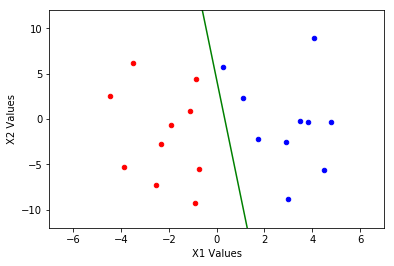

In [7]:
    Y = [None]*20
    X = [None]*20
    for i in range(0, 10):
        X[i] = [random.uniform(-5,-1), random.uniform(-10,10)]
        Y[i] = -1
    for j in range(10, 20):
        X[j] = [random.uniform(1,5), random.uniform(-10,10)]
        Y[j] = 1
    # Y = -1 for 0 to 9
    # Y = 1 for 10 to 20
    np.asarray(X)


    print("X = ", X)
    print("Y = ", Y)
    p = Perceptron(nocovars = 2)
    p.train(X, Y)
    print(p._best_W)
    Xtest = [None]*20
    Ytest = [None]*20
    for i in range(0, 10):
        Xtest[i] = [random.uniform(-5,0), random.uniform(-10,10)]
        Ytest[i] = -1
    for j in range(10, 20):
        Xtest[j] = [random.uniform(0,5), random.uniform(-10,10)]
        Ytest[j] = 1
    # Xtest[0] = [6, 0] # Just for fun to stop the data from being linearly separable
    p.test(Xtest, Ytest, showall = False)

    p.get_eqn(X, Y)

    axes = pyp.gca()
    axes.set_xlim([-7,7])
    axes.set_ylim([-12,12])
    x0 = get_col(Xtest, 0)
    x1 = get_col(Xtest, 1)
    X0red = x0[:len(x0)//2]
    X0blue = x0[len(x0)//2:]
    X1red = x1[:len(x1)//2]
    X1blue = x1[len(x1)//2:]
    pyp.plot(X0red, X1red, 'r.', markersize = 9)
    pyp.plot(X0blue, X1blue, 'b.', markersize = 9)

    pyp.ylabel("X2 Values")
    pyp.xlabel("X1 Values")
    wlx = np.array(range(-5, 5))
    wly = eval('(-p._best_W[1]*wlx - p._best_W[0]) / p._best_W[2]')
    pyp.plot(wlx, wly, 'g')
    pyp.show()

In [113]:
# 1.10)

import numpy as np
import random
import matplotlib.pyplot as pyp

random.seed(3)
rand_choice = random.randint(0, 1000)
x = np.empty(1000)
for i in range(1000):
    x[i] = np.random.binomial(n = 10, p = .5)

c_min = min(x)
print("cmin = ", c_min)
c_rand = x[rand_choice]
print("crand = ", c_rand)
c_1 = x[0]
print("c1 = ", c_1)

# figure out the \mu for the 3 coins selected \E[coin]

# b)

Cmin = np.empty(100000)
Vmin = Cmin
Crand = np.empty(100000)
Vrand = Crand
C1 = np.empty(100000)
V1 = C1
for i in range(100000):
    rc = random.randint(0, 999)
    x = np.random.binomial(n = 10, p = .5, size = 1000)
    Cmin[i] = min(x)
    Vmin[i] = Cmin[i]/10
    Crand[i] = x[rc]
    Vrand[i] = Crand[i]/10
    C1[i] = x[0]
    V1[i] = C1[i]/10

print(sum(V1)/len(V1), sum(Vrand)/len(Vrand), sum(Vmin)/len(Vmin))

cmin =  0.0
crand =  5.0
c1 =  4.0
0.5001800000000075 0.49911600000000145 0.03764299999997672


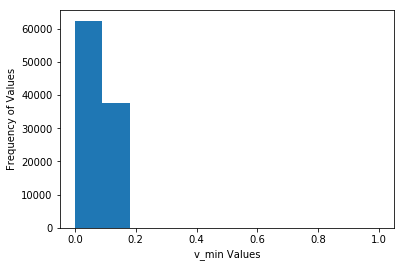

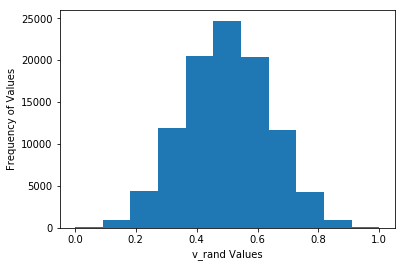

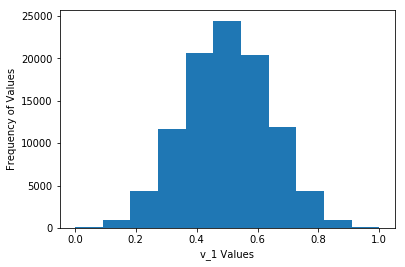

In [114]:
import matplotlib.pyplot as pyp
pyp.hist(Vmin, range = (0,1), bins = 11)
pyp.ylabel("Frequency of Values")
pyp.xlabel("v_min Values")
pyp.show()
pyp.hist(Vrand, range = (0,1), bins = 11)
pyp.ylabel("Frequency of Values")
pyp.xlabel("v_rand Values")
pyp.show()
pyp.hist(V1, range = (0,1), bins = 11)
pyp.ylabel("Frequency of Values")
pyp.xlabel("v_1 Values")
pyp.show()


In [117]:
def prob(v, eps):
    return np.where(abs(v - 0.5) > eps)[0].size/(v.size)

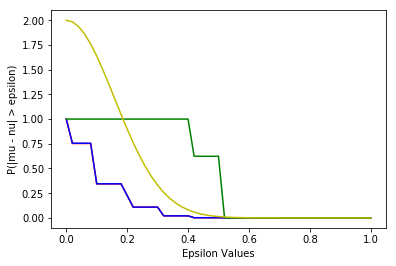

In [130]:
import math

# eps = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
eps = [None]*51
for i in range(0, 51):
    eps[i] = float(i) / 50.0


est_rand = [prob(Vrand, e) for e in eps]
est_1 = [prob(V1, e) for e in eps]
est_min = [prob(Vmin, e) for e in eps]
HD = [2 * math.exp(-2 * pow(e,2) * 10) for e in eps]
    
pyp.plot(eps, est_rand, 'r') # Red is the plot for Y_rand = plot for Y_1
pyp.plot(eps, est_1, 'b') # Blue is plot for Y_1 = plot for Y_rand
pyp.plot(eps, est_min, 'g') # Green is plot for Y_min
pyp.plot(eps, HD, 'y') # Yellow is the plot for Hoeffding bound.
pyp.xlabel("Epsilon Values")
pyp.ylabel("P(|mu - nu| > epsilon)")
pyp.show()
